#Importing Libraries & Dataset

In [ ]:
# pip install -U memory_profiler

In [ ]:
import pandas as pd
import numpy as np

import time

%reload_ext memory_profiler
from memory_profiler import profile

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

seed = 50

In [ ]:
bdata = pd.read_csv("https://raw.githubusercontent.com/rishikatibrewal/Datasets/main/bank-additional-full.csv")

#DATA

In [ ]:
bdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Checking if any column has any empty entry.



In [ ]:
bdata.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Description of categorical columns.


In [ ]:
bdata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Description of numerical columns.

#Exploratory Data Analysis of Categorical Variables

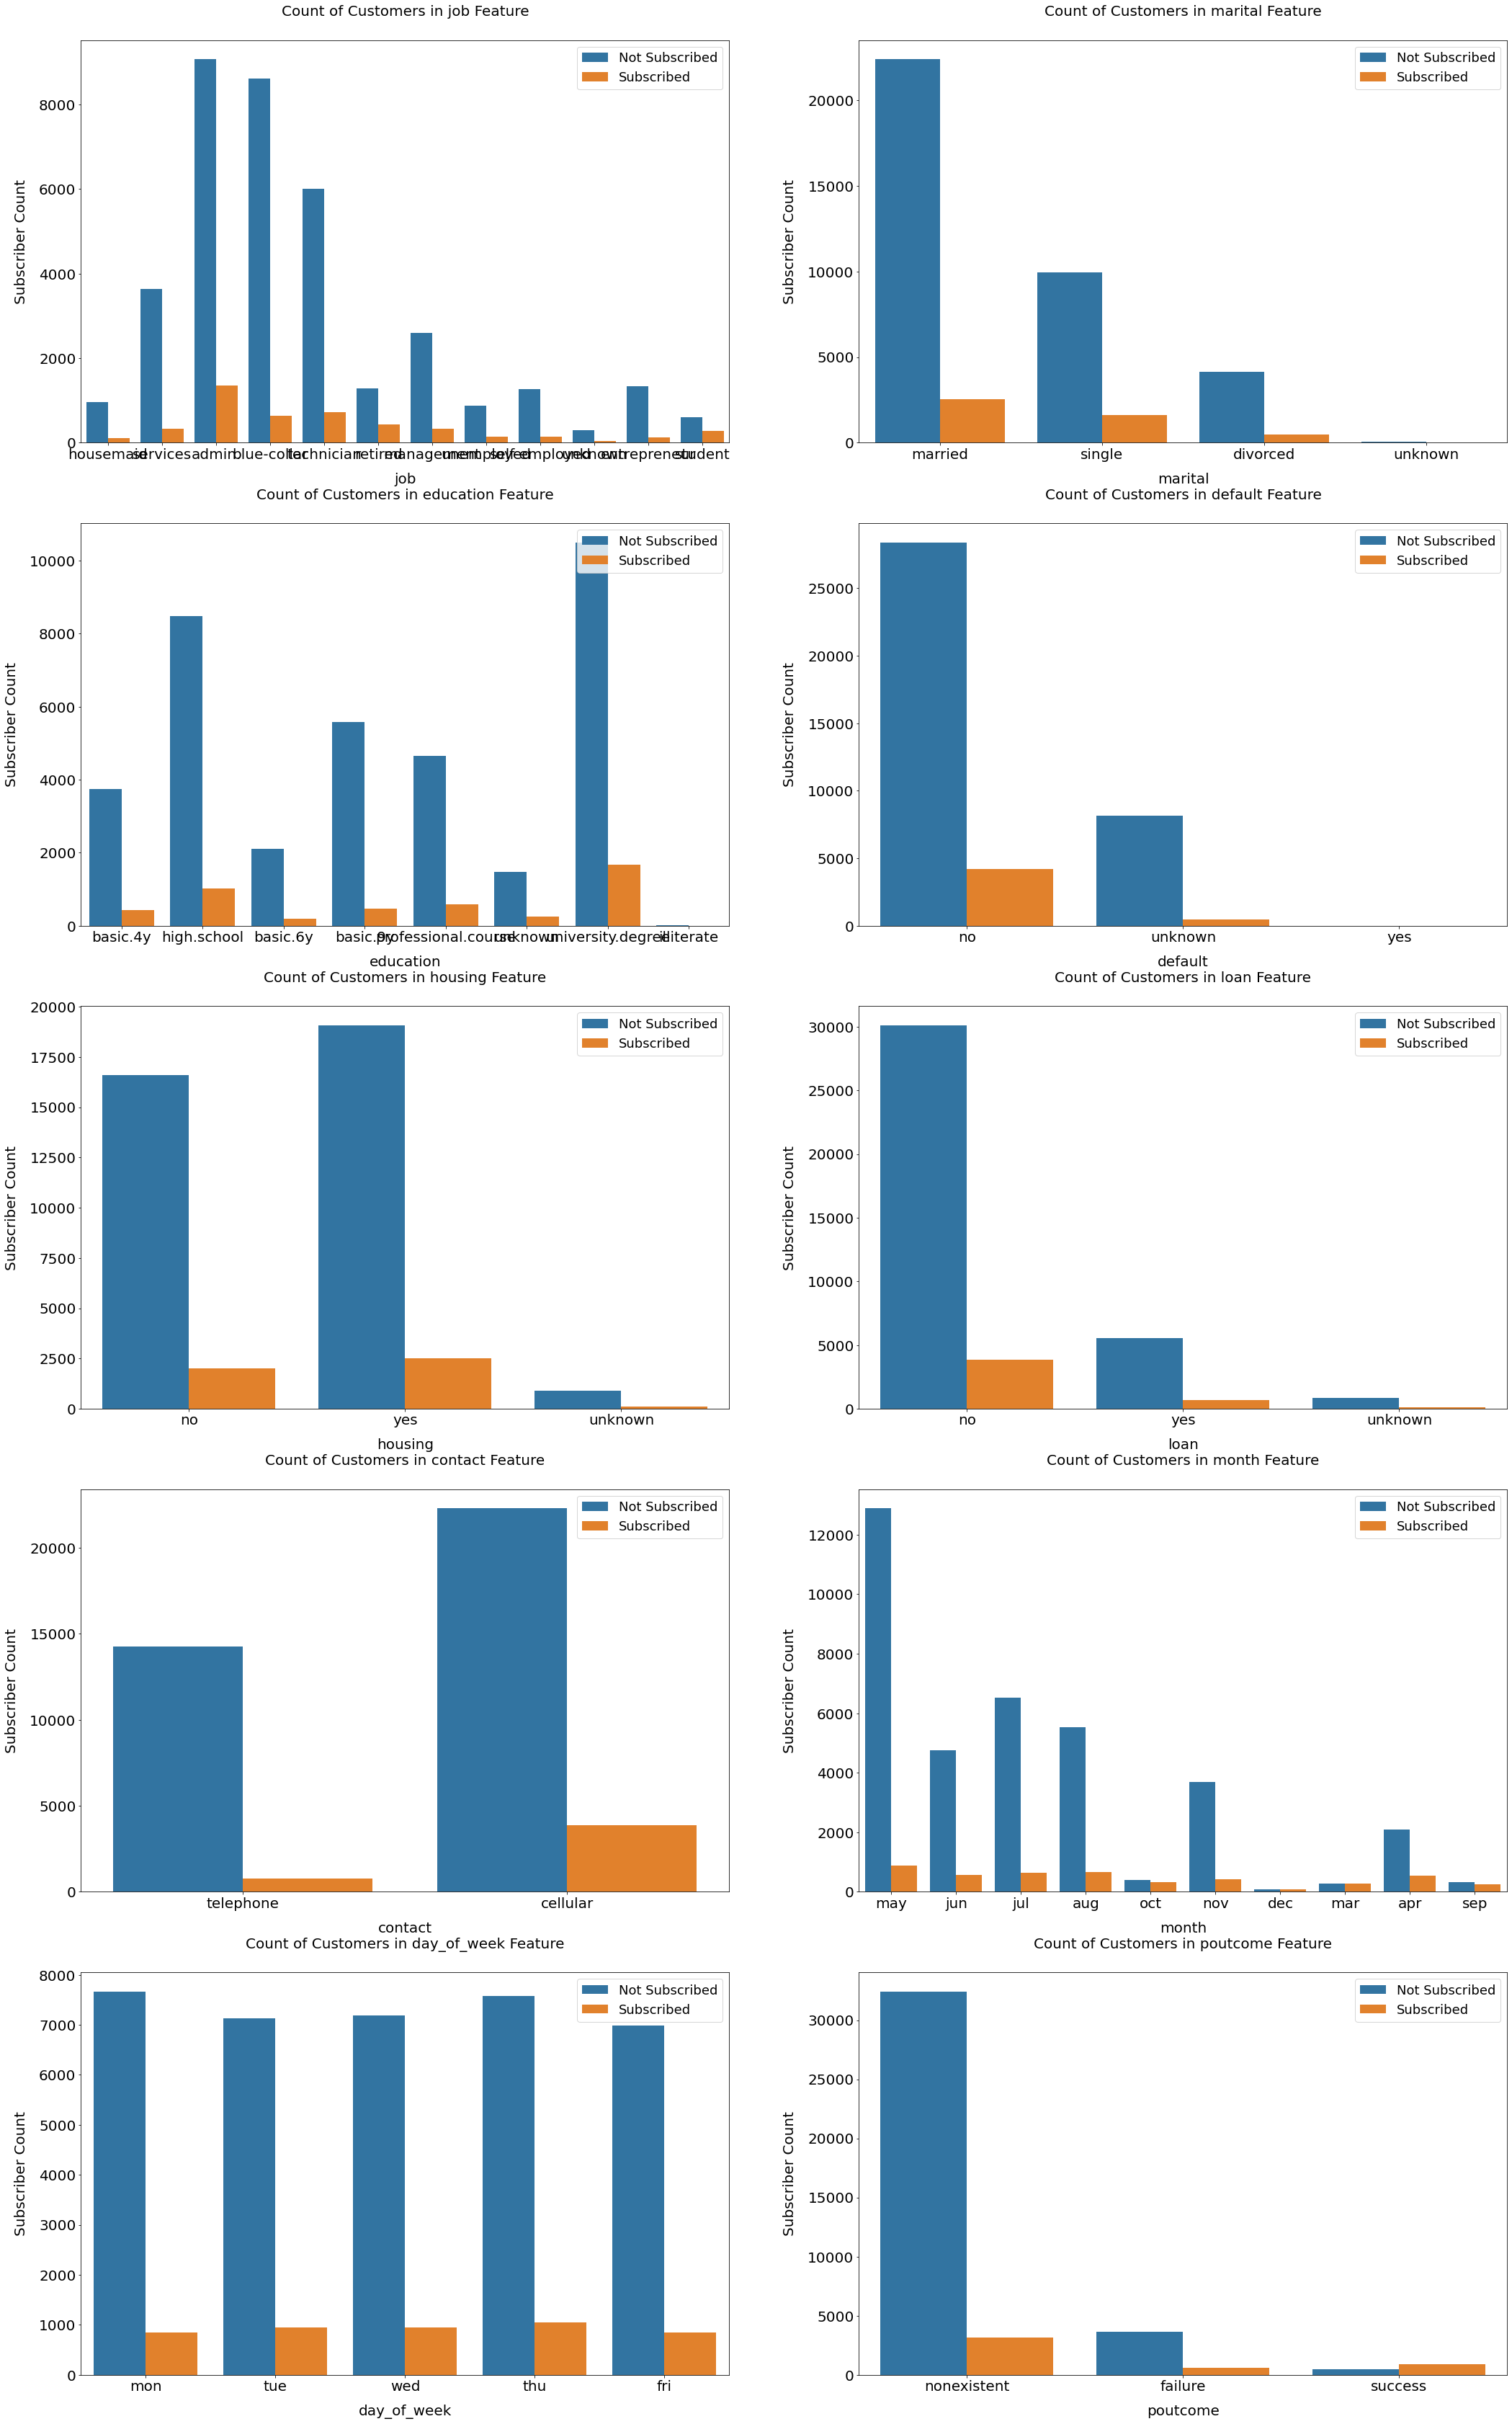

In [ ]:
cat_features = bdata.select_dtypes(include=['object','category']).astype('category').columns.values.tolist()
cat_features.remove("y")
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 40))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(5, 2, i)
    sns.countplot(x=feature, hue='y', data=bdata)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Subscriber Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Subscribed', 'Subscribed'], loc='upper right', prop={'size': 18})
    plt.title('Count of Customers in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

no     36548
yes     4640
Name: y, dtype: int64


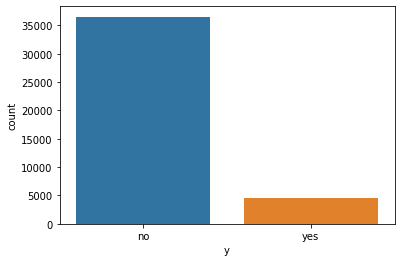

In [ ]:
print(bdata.y.value_counts())
sns.countplot(x='y', data=bdata)

#Preprocessing

In [ ]:
bdata['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The data is highly **imbalanced**.

In [ ]:
cat_var= bdata.select_dtypes(include=['object','category']).astype('category').columns.values.tolist()
cat_var = [i for i in cat_var if i not in ["duration","default","y"]]
bdata.drop(["duration","default"],axis=1,inplace=True)

Dropping columns **duration** and **default**.

In [ ]:
ord_var=["day_of_week","education","month"]
nom_var=[i for i in cat_var if i not in ["day_of_week","education","month"]]  
for c in nom_var:
    bdata=pd.get_dummies(bdata,columns=[c])
for c in ord_var:
    bdata[c]= LabelEncoder().fit_transform(bdata[c])

Applying **one hot encoding** and  **label encoding** to categorical variables.

In [ ]:
train,test = train_test_split(bdata,test_size=0.30,random_state=seed)

Splitting the dataset into 2 parts: **70%** for training dataset and **30%** for test dataset.  

In [ ]:
train['y'].value_counts()

no     25584
yes     3247
Name: y, dtype: int64

Count of each class in training set. 

In [ ]:
test['y'].value_counts()

no     10964
yes     1393
Name: y, dtype: int64

Count of each class in test set. 

In [ ]:
X_train = train.drop("y",axis=1)
Y_train = train["y"]

X_test = test.drop("y",axis=1)
Y_test = test["y"]

#Model Building & fitting

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
dept=list(np.arange(3,11,1))
sam=list(np.arange(200,800,100))
param_grid={'max_depth':dept,'min_samples_split': sam}
model = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train,Y_train)
depth = model.best_estimator_.max_depth
min_s = model.best_estimator_.min_samples_split
print("optimal max_depth", depth)
print("optimal min_samples_split", min_s)

optimal max_depth 8
optimal min_samples_split 600


Using sklearn for hyperparameter tuning. 

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(Y_train),y=Y_train)
class_weights

array([0.56345763, 4.43963659])

Since data is imbalanced, we apply different class weights to each class, giving more weight to the minority, i.e., yes. 

In [ ]:
%%time
decision_tree = DecisionTreeClassifier(max_depth = depth,min_samples_split=min_s,class_weight={'no':class_weights[0],'yes':class_weights[1]},random_state = seed)
%memit 
decision_tree.fit(X_train, Y_train)

peak memory: 347.81 MiB, increment: 0.00 MiB
CPU times: user 293 ms, sys: 52.6 ms, total: 346 ms
Wall time: 502 ms


In [ ]:
pred = decision_tree.predict(X_test)

Score = decision_tree.score(X_test, Y_test)
print('Score for Decision Tree model is :: {:.2f}'.format(Score*100))

Score for Decision Tree model is :: 82.83


#Classification Report of Model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

          no       0.95      0.85      0.90     10964
         yes       0.36      0.64      0.46      1393

    accuracy                           0.83     12357
   macro avg       0.65      0.75      0.68     12357
weighted avg       0.88      0.83      0.85     12357



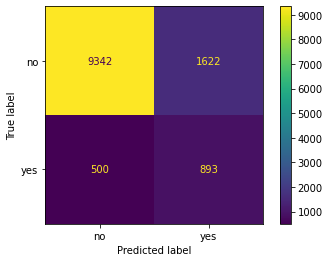

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decision_tree ,X_test,Y_test,display_labels=['no','yes'])